## Configuração e Bibliotecas

In [84]:
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import seaborn as sns
from dotenv import load_dotenv
from pathlib import Path


In [ ]:

sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)
pd.set_option('display.max_columns', None) 
pd.set_option('display.max_rows', 100)

## Carregando variáveis de ambiente e arquivos

In [87]:

load_dotenv('../.env') 
BASE_DIR = Path.cwd().parent
RAW_PATH = BASE_DIR / os.getenv("RAW_DATA_PATH")
BRONZE_PATH = BASE_DIR / os.getenv("BRONZE_DATA_PATH")
SILVER_PATH = BASE_DIR / os.getenv("SILVER_DATA_PATH")

print(f"Raw Path: {RAW_PATH}")
print(f"Bronze Path: {BRONZE_PATH}")
print(f"Silver Path: {SILVER_PATH}")

Raw Path: c:\Users\mvcor\projetos\Avaliação itaú\data\raw
Bronze Path: c:\Users\mvcor\projetos\Avaliação itaú\data\bronze
Silver Path: c:\Users\mvcor\projetos\Avaliação itaú\data\silver


In [39]:

df_train = pd.read_parquet(os.path.join(BRONZE_PATH, "application_train.parquet"))
df_test = pd.read_parquet(os.path.join(BRONZE_PATH, "application_test.parquet"))

# Coluna auxiliar para identificar origem após concatenação
df_train['is_train'] = True
df_test['is_train'] = False

# Unindo para tratamento único
df_all = pd.concat([df_train, df_test], ignore_index=True)

print(f"Dataset Completo: {df_all.shape}")
df_all.head()

Dataset Completo: (356255, 123)


,sk_id_curr,target,name_contract_type,code_gender,flag_own_car,flag_own_realty,cnt_children,amt_income_total,amt_credit,amt_annuity,...,flag_document_19,flag_document_20,flag_document_21,amt_req_credit_bureau_hour,amt_req_credit_bureau_day,amt_req_credit_bureau_week,amt_req_credit_bureau_mon,amt_req_credit_bureau_qrt,amt_req_credit_bureau_year,is_train
0,100002,1.0,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0,True
1,100003,0.0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,True
2,100004,0.0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,True
3,100006,0.0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,True
4,100007,0.0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0,True


## Validação geral de dados

### Resumo

In [78]:
desc_stats = df_all.describe().T
desc_stats

,count,mean,std,min,25%,50%,75%,max
sk_id_curr,356255.0,278128.000000,102842.104413,100001.0,189064.5,278128.0,367191.5,456255.0
target,307511.0,0.080729,0.272419,0.0,0.0,0.0,0.0,1.0
cnt_children,356255.0,0.414316,0.720378,0.0,0.0,0.0,1.0,20.0
amt_income_total,356255.0,170116.059860,223506.819009,25650.0,112500.0,153000.0,202500.0,117000000.0
amt_credit,356255.0,587767.413753,398623.693715,45000.0,270000.0,500211.0,797557.5,4050000.0
...,...,...,...,...,...,...,...,...
amt_req_credit_bureau_day,308687.0,0.006281,0.104250,0.0,0.0,0.0,0.0,9.0
amt_req_credit_bureau_week,308687.0,0.029995,0.191374,0.0,0.0,0.0,0.0,8.0
amt_req_credit_bureau_mon,308687.0,0.231697,0.855949,0.0,0.0,0.0,0.0,27.0
amt_req_credit_bureau_qrt,308687.0,0.304399,0.786915,0.0,0.0,0.0,0.0,261.0


### Duplicidade

In [83]:

# 1. Verifica duplicatas exatas (Linha inteira igual)
duplicatas_exatas = df_all.duplicated().sum()
print(f"Linhas inteiramente duplicadas: {duplicatas_exatas}")

# 2. Verifica duplicatas de ID 

ids_duplicados = df_all.duplicated(subset=['sk_id_curr']).sum()
print(f"IDs de clientes duplicados: {ids_duplicados}")


Linhas inteiramente duplicadas: 0
IDs de clientes duplicados: 0
✅ Chaves primárias únicas. Integridade garantida.


### Análise da Variável Alvo

C:\Users\mvcor\AppData\Local\Temp\ipykernel_19984\2516467826.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=target_counts.index, y=target_counts.values, palette='viridis')


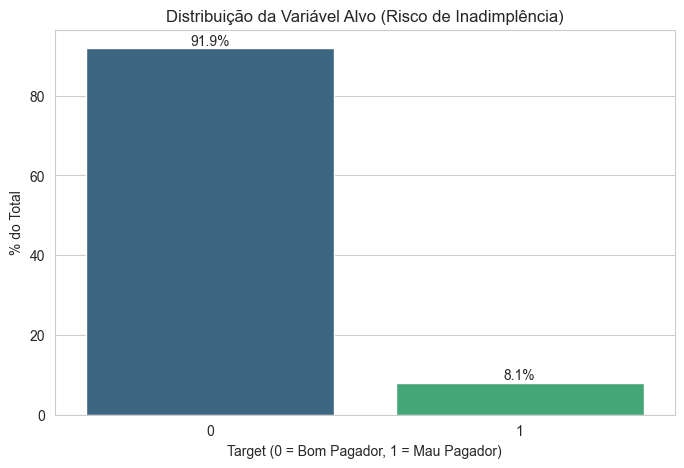

Taxa de Inadimplência Global: 8.07%


In [72]:
# quão raro é o evento "Default" (Calote)?

# Célula 3: Distribuição do Target (Apenas Treino)
target_counts = df_train['target'].value_counts(normalize=True) * 100

plt.figure(figsize=(8, 5))
ax = sns.barplot(x=target_counts.index, y=target_counts.values, palette='viridis')
plt.title("Distribuição da Variável Alvo (Risco de Inadimplência)")
plt.ylabel("% do Total")
plt.xlabel("Target (0 = Bom Pagador, 1 = Mau Pagador)")

# Adiciona rótulos nas barras
for p in ax.patches:
    ax.annotate(f'{p.get_height():.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', xytext=(0, 5), textcoords='offset points')
plt.show()

print(f"Taxa de Inadimplência Global: {df_train['target'].mean():.2%}")

### Missing Values

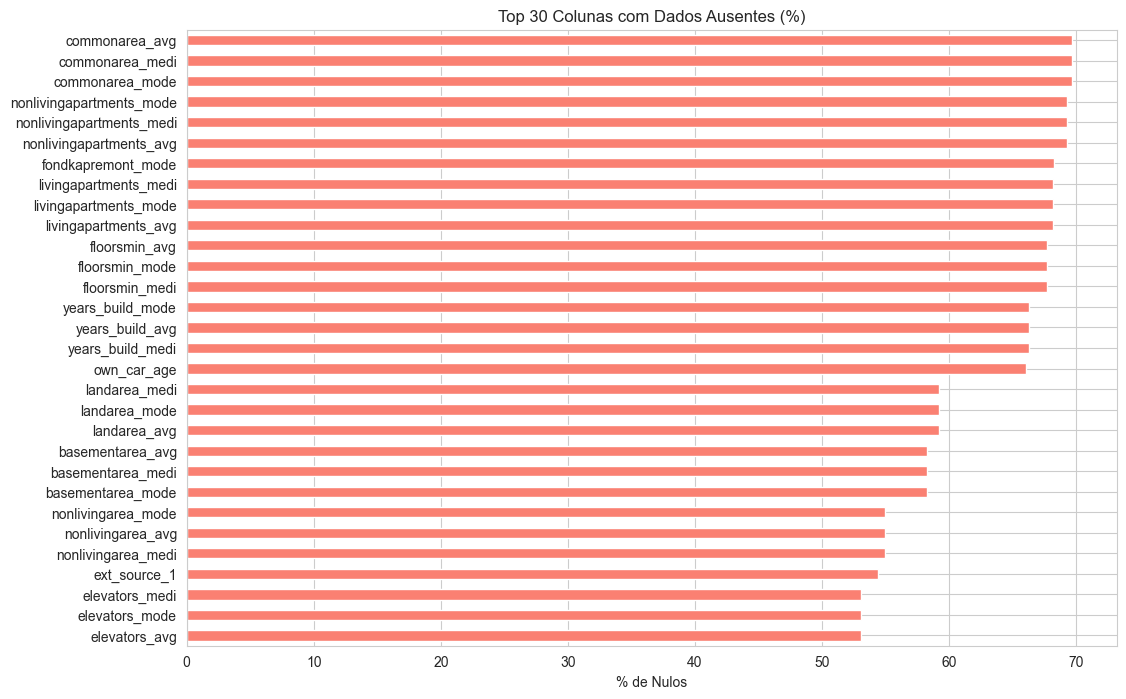

Colunas críticas (>50% nulos): 37


In [73]:

# Calcula % de nulos por coluna
missing = (df_all.isnull().sum() / len(df_all) * 100).sort_values(ascending=False)
missing = missing[missing > 0]

plt.figure(figsize=(12, 8))
missing.head(30).plot(kind='barh', color='salmon')
plt.title("Top 30 Colunas com Dados Ausentes (%)")
plt.xlabel("% de Nulos")
plt.gca().invert_yaxis() # Inverte para o maior ficar no topo
plt.show()

# Insight Rápido
print("Colunas críticas (>50% nulos):", len(missing[missing > 50]))

### Análise de Tipos e Cardinalidade

In [79]:

cat_cols = df_all.select_dtypes(include=['object', 'string']).columns

cardinality = df_all[cat_cols].nunique().sort_values(ascending=False)
print("Cardinalidade das Variáveis Categóricas (Top 10):")
print(cardinality.head(10))

const_cols = [col for col in df_all.columns if df_all[col].nunique() <= 1]
print(f"\nColunas Constantes (Inúteis): {const_cols}")

Cardinalidade das Variáveis Categóricas (Top 10):
organization_type             58
occupation_type               18
name_income_type               8
name_type_suite                7
wallsmaterial_mode             7
weekday_appr_process_start     7
name_family_status             6
name_housing_type              6
name_education_type            5
fondkapremont_mode             4
dtype: int64

Colunas Constantes (Inúteis): []


### Outliers

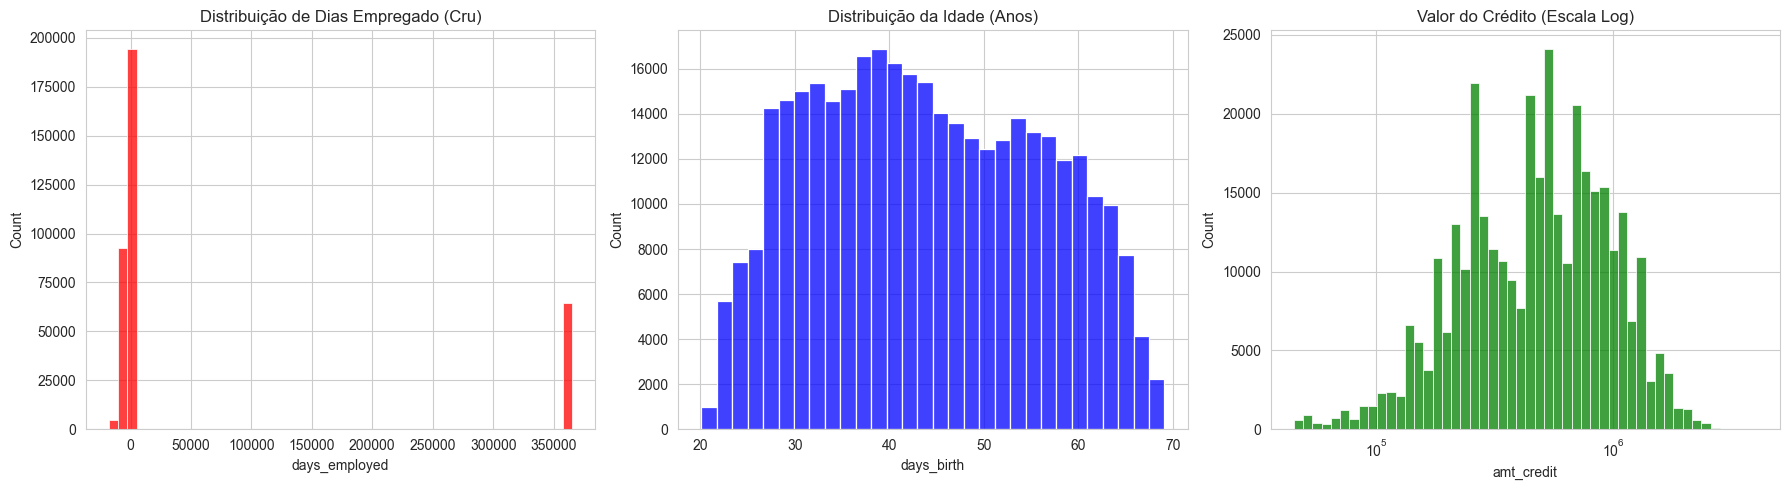

Registros com '365243' em Dias Empregado: 64648 (18.1%)


In [75]:
# focando em colunas de interesse numérico
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# 1. Dias Empregado
sns.histplot(df_all['days_employed'], bins=50, ax=axes[0], color='red')
axes[0].set_title('Distribuição de Dias Empregado (Cru)')

# 2. Idade (Convertendo para Anos)
# Nota: Dias originamente são negativos
sns.histplot(df_all['days_birth'] / -365, bins=30, ax=axes[1], color='blue')
axes[1].set_title('Distribuição da Idade (Anos)')

# 3. Valor do Crédito
sns.histplot(df_all['amt_credit'], bins=50, ax=axes[2], color='green', log_scale=True)
axes[2].set_title('Valor do Crédito (Escala Log)')

plt.tight_layout()
plt.show()


### Correlações

Top 5 Correlações Positivas (Aumentam risco):
days_last_phone_change         0.055218
region_rating_client           0.058899
region_rating_client_w_city    0.060893
days_birth                     0.078239
target                         1.000000
Name: target, dtype: float64

Top 5 Correlações Negativas (Diminuem risco):
ext_source_3    -0.178919
ext_source_2    -0.160472
ext_source_1    -0.155317
days_employed   -0.044932
floorsmax_avg   -0.044003
Name: target, dtype: float64


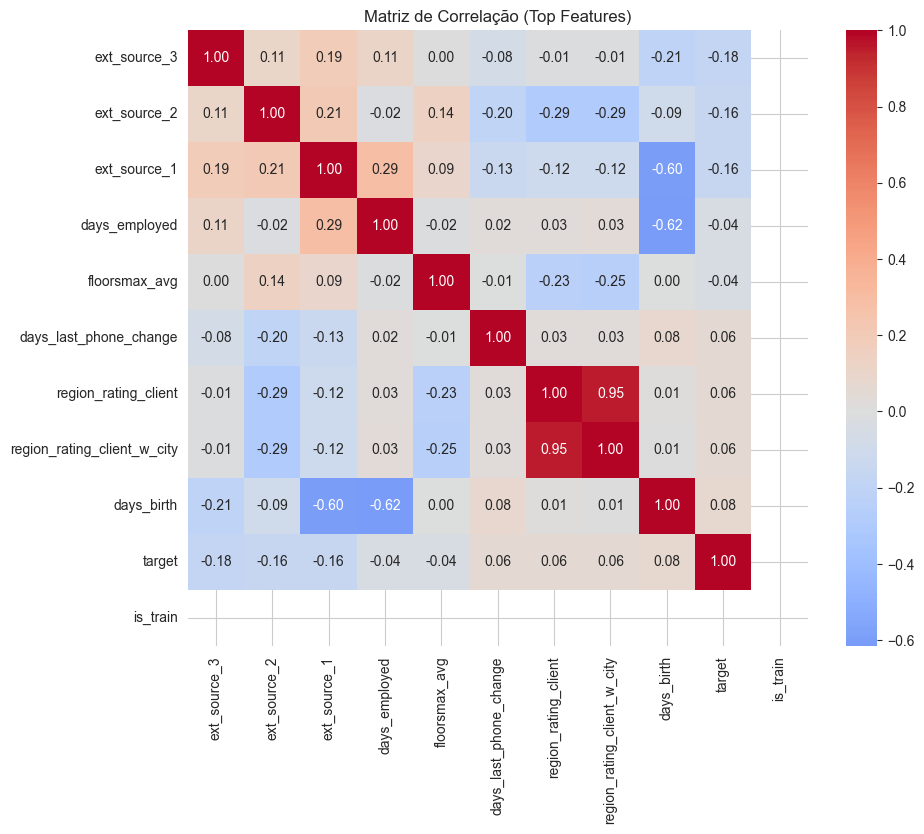

In [76]:
# Célula 7: Correlação com o Target
# Correlação de Pearson apenas com colunas numéricas
correlations = df_train.corr(numeric_only=True)['target'].sort_values()

print("Top 5 Correlações Positivas (Aumentam risco):")
print(correlations.tail(6)[:-1]) # Exclui o próprio target

print("\nTop 5 Correlações Negativas (Diminuem risco):")
print(correlations.head(5))

# Heatmap das principais
cols_corr = correlations.head(5).index.tolist() + correlations.tail(6).index.tolist()
plt.figure(figsize=(10, 8))
sns.heatmap(df_train[cols_corr].corr(), annot=True, fmt=".2f", cmap='coolwarm', center=0)
plt.title("Matriz de Correlação (Top Features)")
plt.show()